<a href="https://colab.research.google.com/github/AY0ungKim/AI-Study/blob/main/Training_Neural_Networks2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**머신러닝 딥러닝 서울대 이준석 교수님 강의 정리**

## 1. Regulariation for Neural Networks

- Neural Network도 overfitting에 취약함 -> 해결 필요

<br/>

> (1) Weight decay: ridge regression과 lasso regression처럼 penalty term을 추가하는 방식

>> 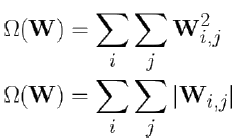

> (2) Early Stopping: validation set을 기준으로, validation loss가 나빠지는 기점으로 training 멈추기

> (3) **Dropout**

>> (a) fully-connected layer를 사용하지 말고 랜덤으로 몇개의 노드를 골라서 훈련시키기. (image의 경우 feature을 랜덤으로 골라서 훈련시키는 과정)


>> enough capacity가 있다면, dropout으로 랜덤하게 훈련시킨 모델도 그 대상에 대한 대표성이 존재할것. test할 때는 모든 neuron 사용하는 과정

>> 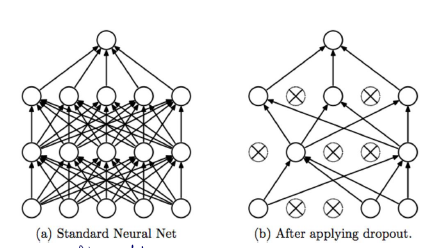




>> Dropout 함수 정의해서 사용하기

In [1]:
import numpy as np

def train_step(data, p):
  # p = dropout rate
  h1 = np.maximum(0, np.dot(w1, data) + b1)
  u1 = (np.random.rand(*h1.shape) < p) /p #u1: p기준으로 0아니면 1값을 갖고 있음
  h1 *= u1 # h1: u1=1이었던 값만 살아남음
  h2 = np.maximum(0, np.dot(w2, h1) + b2)
  u2 = (np.random.rand(*h2.shape) < p)/p
  h2 *= u2
  return np.dot(w3, h2) + b3 #3층짜리 nerual network

#원래는 전체 데이터의 1/p정도밖에 못써서 test할 때는 p를 곱해줘야하는데, 위에 대신 p를 나눔으로써 test할때 과정 생략
def test_step(data):
  h1 = np.maximum(0, np.dot(w1, data) + b1)
  h2 = np.maximum(0, np.dot(w2, h1) + b2)
  return np.dot(w3, h2) + b3


>> torch 라이브러리 이용해서 dropout 사용하기

In [2]:
from torch import nn


def __init__(self, config, **kwargs):
  self.linear = nn.Linear(224, 32)
  self.dropout = nn.Dropout(p=0.2)

def call(self, inputs, training=True):
  embeddings = self.linear(inputs)
  embeddings = self.dropout(embeddings)

> (4) Cutout: 아래 그림처럼 그림의 일부분은 잘라내서 사용하는 방법

>> 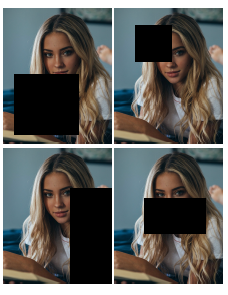


<br/>

- 실전에서 사용하는 방법

>> (1) 큰 fully-connected layer에서 dropout 고려하기

>> (2) Batch normalization 고려해보는 것은 항상 좋은 선택

>> (3) small-scale dataset에서는 data augmentation해서 데이터 불려보기

>> (4) final metric사용할 때 early stopping하기







## 2. Optimization beyond SGD

- SGD의 문제점

> (1) Jittering: Optimal direction에 비해 비효율적으로 움직여서 매우 느리게 실행될 수 있음

>> 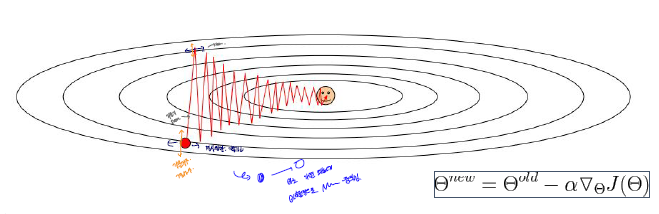

> (2) saddple point에 도달할 수 있음


>> 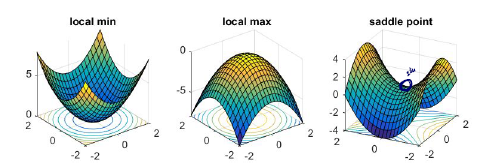

> (3) mini-batch가 전체 데이터를 대표하지 못할 수 있음 (SGD에서는 무조건 미니배치를 크게 쓰는게 좋은 성능을 나타내는데, 너무 큰 데이터에서 잘게 자르는 과정에서 성능이 나빠질 수 있음)

>> 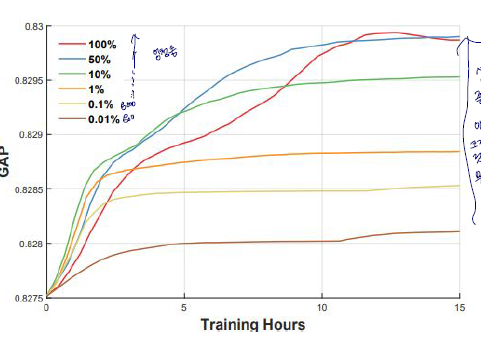

- SGD + Momentum (Saddle point 문제 해결)

>> Saddle point에 빠졌을 때, 기존에 왔던 gradient의 역사들을 고려해서 마치 관성처럼, saddle point에 있더라도 기존에 있던 속도 (gradient의 역사들의 합)를 이용해서 빠져나가는 방법

>> 수식으로 나타내면 아래와 같음

>> 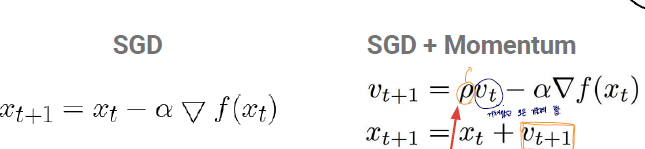

>> Jittering문제에서도 기존의 관성을 알고 있으면, 천천히 update하기 보다는 좀더 큰 간격으로 업데이트 가능.

>> 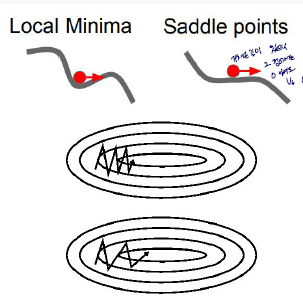




- Adagrad (Jittering 문제 해결)

>> 전체 gradient의 역사를 기억해놨다가 누적된 gradient가 큰 쪽(steep)에 대해서는 적게 이동하고, 작은 쪽(완만)에 대해서는 크게 이동하는 방식

>> 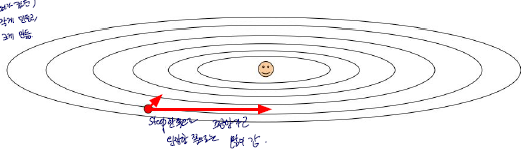

In [ ]:
grad_squared = 0.0

while True:
  dx = compute_gradient(x)
  grad_squared += dx * dx
  divider = np.sqrt(grad_squared) + 1e-7 #내려오면서 각각 계산했던 gradient 값들이 있을텐데, 그것들을 제곱해서 누적해서 더함 -> gradient가 큰 부분에 대해서는 커졌을 것이고, 작은 부분에 대해서는 작아졌을 것. 기울기가 큰 쪽에 대해 큰 값을 나눠주면 전체 값이 작아지니까 저지를 시켜줄 수 있는 것
  x -= learning_rate * dx / divider #원래는 "x -= learning_rate * dx"로 dx(gradient)를 빼주는데, 그걸 divider로 나눠줌

- RMSProp: Leaky AdaGrad

>> AdaGrad의 문제점: 그냥 AdaGrad는 결국 divider에 들어갈 숫자가 계속 커지기만하니, 업데이트되는 gradient양이 점점 작아지기만 함. 즉, 더 천천히 하게 하거나 덜 천천히 하게 하거나 등의 문제 발생

>> 정의: 역사에 대한 값과 현재 gradient에 해당하는 값에 가중치 (각각의 가중치의 합이 1이 되도록)를 두는 방식

In [ ]:
while True:
  dx = compute_gradient(x)
  grad_squared = dr * grad_squared + (1 - dr) * dx * dx #더하는 grad_squared에 가중치를 부여
  divider = np.sqrt(grad_squared) + 1e-7
  x -= learning_rate * dx / divider

- **Adam** (가장 많이 사용됨. 웬만하면 이거 써라!)

>> 정의: RMSProp + SGD with momentum



In [ ]:
first_moment = 0.0
second_moment = 0.0
while True:
  dx = compute_gradient(x)
  first_moment = beta1 * first_moment + (1 - beta1) * dx #SGD with momentum
  second_moment = beta2 * second_moment + (1 - beta2) * dx * dx #RMSProp
  divider = np.sqrt(second_moment) + 1e-7 #RMSProp
  x -= learning_rate * first_moment / divider #RMSProp

- First order vs. Second order Optimization

>- First order: 한번 미분해서 이동하는 (linear) 방식으로, 한번 계산할 때 빠르지만, 굉장히 많은 스텝을 이동해야 함

>- Second order: 두번 미분해서 이동하는 (포물선) 방식으로, 한번 계산할 때 매우 오래걸리지만, 더 적은 스텝을 이동해도 됨.

>> 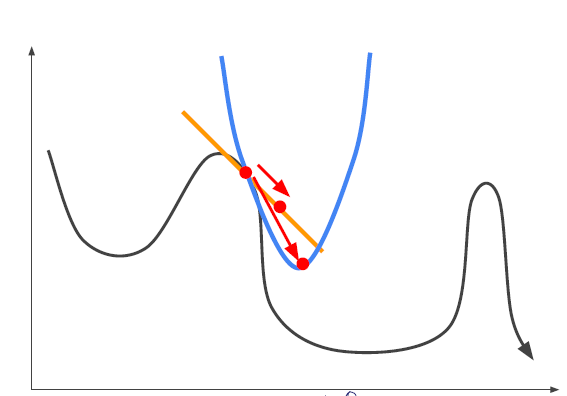

- 실전에서 optimization하기

>> 일단 **Adam**써라. 그리고 나서 SGD+momentum도 한번 써봐라. (learning rate와 decay schedule 별도 지정 필요) Initial learning rate에 따라 모델이 확확 바뀔 수 있으니 다양한 값 시도해봐라.




## 3. Batch Normalization


- 미니배치 (전체 데이터를 나눈)를 normalize (zero-mean unit-variance) 시키자!



- 배경: Neural Network로 training할때는 zero-mean unit-variance input을 사용하는게 좋음. 하지만, layer가 쌓여 있을 때는, 첫 layer를 통과한 값을 다시 zero-mean unit-variance 시키는 것은 올바르지 않음. 그렇다면, 어떻게 모든 layer에 들어가는 값을 이렇게 변형할 수 있을까?


>> -> 일단은 그냥 막 정규화 시키자!

- 과정

>> (1) 아래처럼 각 배치의 x값들을 평균과 분산을 이용해서 zero-mean unit-variance로 만들자

>> 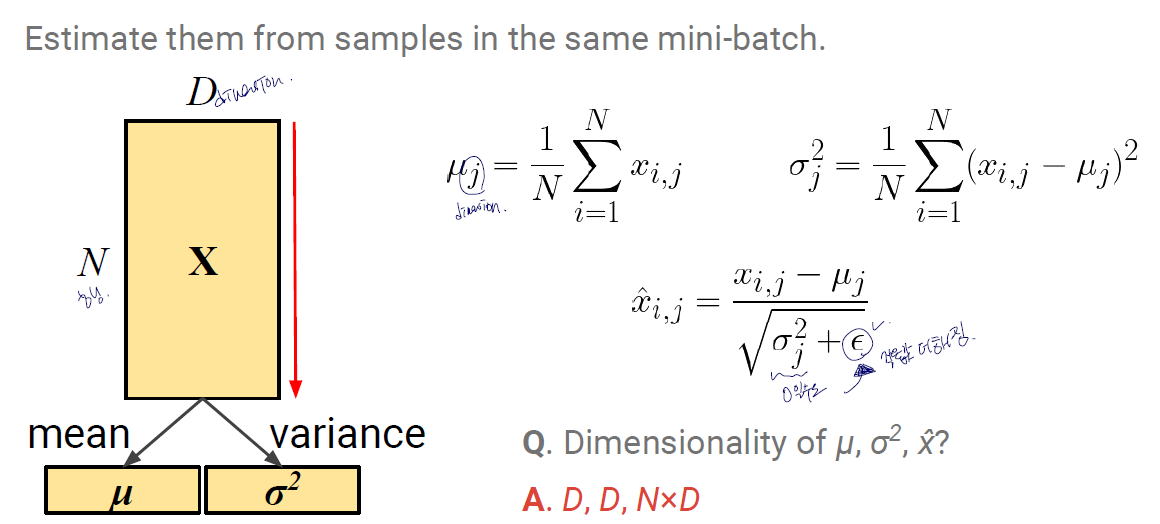

>> (2) 그 다음, 매개변수 gamma k(분산과 비슷)와 beta k(평균과 비슷)를 찾아내어 y k를 만들자


>> 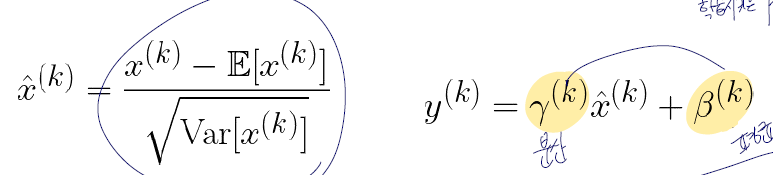


- test할 때는, mini batch이용하지 않기 때문에, batch=1에서 training할때 구한 평균과 분산들을 평균해서 가져다 씀 (iid 가정 하에)


- 장점:

> (1) 학습 속도 향상: 배치 정규화를 통해 각 층의 입력이 정규화되어 학습 속도가 빨라집니다.

> (2) 더 높은 학습률: 배치 정규화를 사용하면 더 높은 학습률을 사용할 수 있습니다.

> (3) 초기화 민감도 감소: 가중치 초기화에 덜 민감해집니다.

> (4) 과적합 감소: 정규화 과정에서 노이즈가 추가되어 과적합을 방지하는 데 도움이 됩니다.


- 단점:

> (1) 데이터가 iid 분포를 따르지 않을 경우 (매 배치마다 평균과 분산이 비슷한 경우) test와 trainig이 일치하지 않을 수 있음

> (2) batch size가 너무 작은 경우

- 실전에서의 사용:

>> activation function  들어가기 전에 (activation function에 넣기 위해 zero mean 만든 것.)

>> 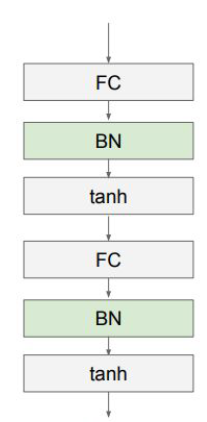

In [3]:
#pytorch 패키지 사용
class MyNeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(32 * 32 * 3, 64),
      nn.BatchNorm1d(64), #내장되어 있음.
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.BatchNorm1d(32),
      nn.ReLU(),
      nn.Linear(32, 10)
    )
  def forward(self, x):
    return self.layers(x)

>> 평균과 분산을 어떻게 구하냐에 따라서 다양한 batch normalization 나옴 (batch나 layer 많이 씀)


>> 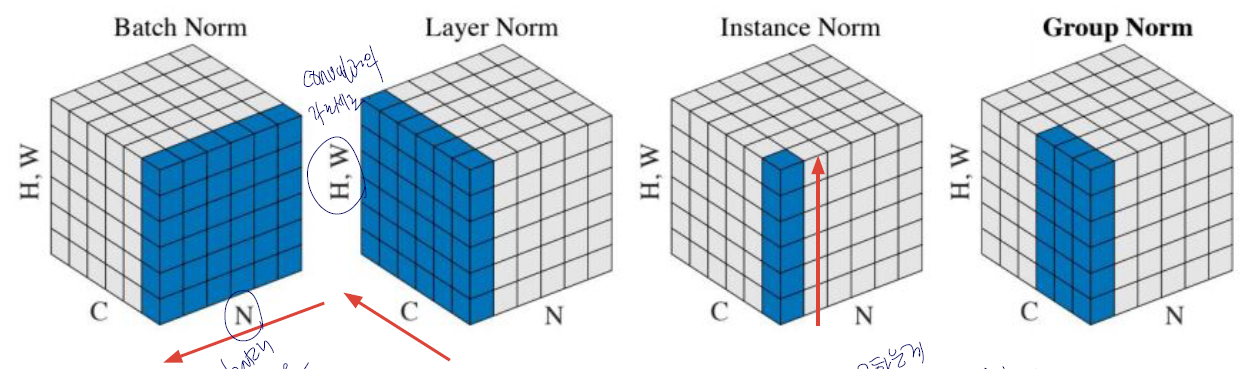